# Introduction

Proteins are chains of amino acids joined together by peptide bonds. Many conformations of this chains are possible due to the many possible combinations of amino acids and rotation of the chain in multiple positions along the chain. It is these conformation changes that are responsible for differences in the three dimensional structure of proteins.

protein-molecule-structure

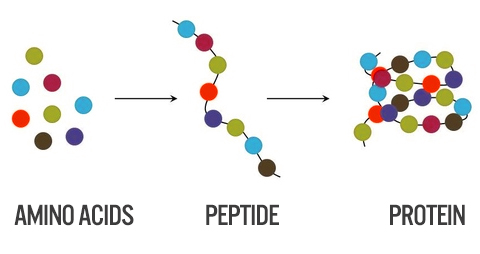

The protein structure can be considered as a sequence of secondary structure elements, such as α helices and β sheets, which together constitute the overall three-dimensional configuration of the protein chain.

In [1]:
!pip install tensorflow

In [2]:
import numpy as np 
import pandas as pd
import math
import copy

from keras.models import Model
from keras.layers import Input, LSTM, Dense,TimeDistributed, Bidirectional

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import tensorflow as tf 
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from keras.callbacks import TensorBoard,ModelCheckpoint

from keras import backend  as K
import tensorflow as tf                                         
from sklearn.model_selection import train_test_split   #to split dataset into train and test set
from sklearn.svm import SVC                            #to create svc instance
from sklearn.metrics import classification_report      #to create report for precision,recall,f1-score,accuracy
from sklearn import metrics                            #to get accuracy
from sklearn.model_selection import GridSearchCV       #to optimise the hyper-parameter



In [3]:

from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv('/content/drive/MyDrive/PSSP DATA/2018-06-06-ss.cleaned.csv').sort_values(by=['pdb_id','chain_code'])
print('number of rows (sequences): {}'.format(df.shape[1]))
print('number of unique proteins: {}'.format(len(df.pdb_id.unique())))
df.head()


number of rows (sequences): 7
number of unique proteins: 139496


,pdb_id,chain_code,seq,sst8,sst3,len,has_nonstd_aa
124730,101M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,CCCCHHHHHHHHHHHHHHGGGHHHHHHHHHHHHHHHCGGGGGGCTT...,CCCCHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHCHHHHHHCCC...,154,False
138377,102L,A,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSE...,CCHHHHHHHHHCCEEEEEECTTSCEEEETTEEEESSSCTTTHHHHH...,CCHHHHHHHHHCCEEEEEECCCCCEEEECCEEEECCCCCCCHHHHH...,165,False
124731,102M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,CCCCHHHHHHHHHHHHHHGGGHHHHHHHHHHHHHHHCGGGGGGCTT...,CCCCHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHCHHHHHHCCC...,154,False
140434,103L,A,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNSLDAAK...,CCHHHHHHHHHCCEEEEEECTTSCEEEETTEECCCCCCCCCHHHHH...,CCHHHHHHHHHCCEEEEEECCCCCEEEECCEECCCCCCCCCHHHHH...,167,False
124732,103M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,CCCCHHHHHHHHHHHHHHGGGHHHHHHHHHHHHHHHCGGGGGGCTT...,CCCCHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHCHHHHHHCCC...,154,False


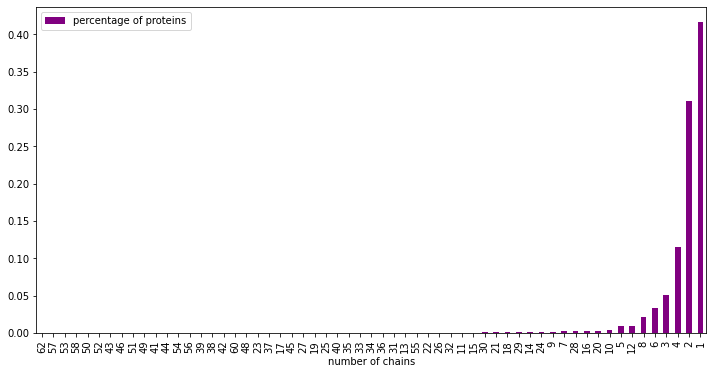

In [5]:
gb = df.groupby(['pdb_id'],as_index=False)['chain_code'].count().sort_values(by='chain_code',ascending=True)
gb.rename(columns={'chain_code':'number of chains'},inplace=True)
gb2 = gb.groupby('number of chains',as_index=False)['pdb_id'].count().sort_values(by='pdb_id',ascending=True)

gb3 = gb2.rename(columns={'pdb_id':'proteins count'})
gb3['percentage of proteins'] = gb3['proteins count']/len(df.pdb_id.unique())
gb3.plot.bar(x='number of chains',y='percentage of proteins',figsize=(12,6),color ="purple")


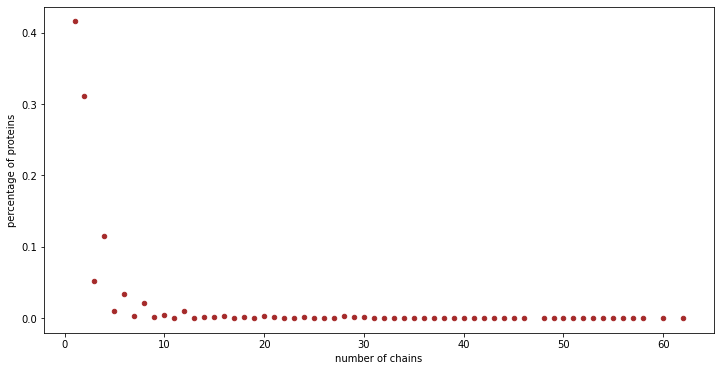

In [6]:
gb = df.groupby(['pdb_id'],as_index=False)['chain_code'].count().sort_values(by='chain_code',ascending=True)
gb.rename(columns={'chain_code':'number of chains'},inplace=True)
gb2 = gb.groupby('number of chains',as_index=False)['pdb_id'].count().sort_values(by='pdb_id',ascending=True)

gb3 = gb2.rename(columns={'pdb_id':'proteins count'})
gb3['percentage of proteins'] = gb3['proteins count']/len(df.pdb_id.unique())

gb3.plot.scatter(x='number of chains',y='percentage of proteins',figsize=(12,6),color ="brown")


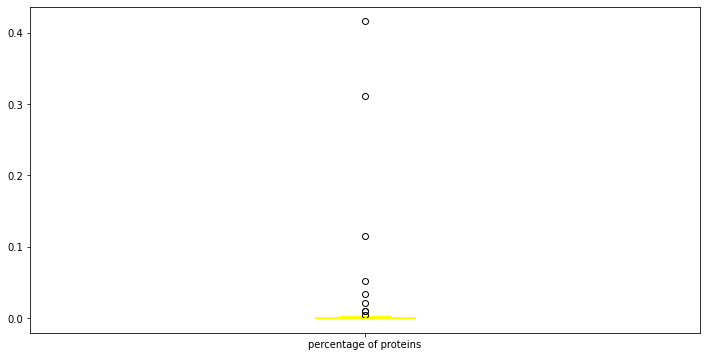

In [7]:
 gb = df.groupby(['pdb_id'],as_index=False)['chain_code'].count().sort_values(by='chain_code',ascending=True)
gb.rename(columns={'chain_code':'number of chains'},inplace=True)
gb2 = gb.groupby('number of chains',as_index=False)['pdb_id'].count().sort_values(by='pdb_id',ascending=True)

gb3 = gb2.rename(columns={'pdb_id':'proteins count'})
gb3['percentage of proteins'] = gb3['proteins count']/len(df.pdb_id.unique())

gb3.plot.box(x='number of chains',y='percentage of proteins',figsize=(12,6),color ="yellow")

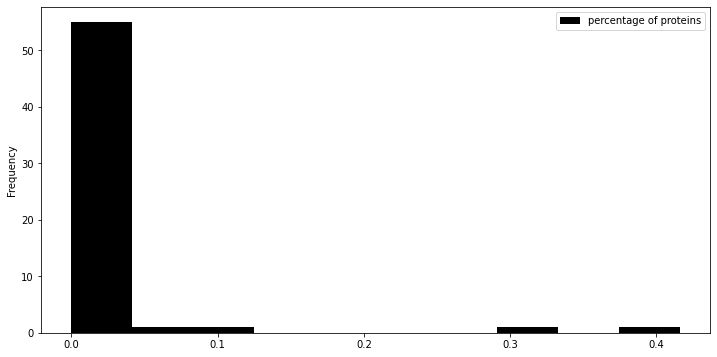

In [8]:
gb = df.groupby(['pdb_id'],as_index=False)['chain_code'].count().sort_values(by='chain_code',ascending=True)
gb.rename(columns={'chain_code':'number of chains'},inplace=True)
gb2 = gb.groupby('number of chains',as_index=False)['pdb_id'].count().sort_values(by='pdb_id',ascending=True)

gb3 = gb2.rename(columns={'pdb_id':'proteins count'})
gb3['percentage of proteins'] = gb3['proteins count']/len(df.pdb_id.unique())

gb3.plot.hist(x='number of chains',y='percentage of proteins',figsize=(12,6),color ="black")


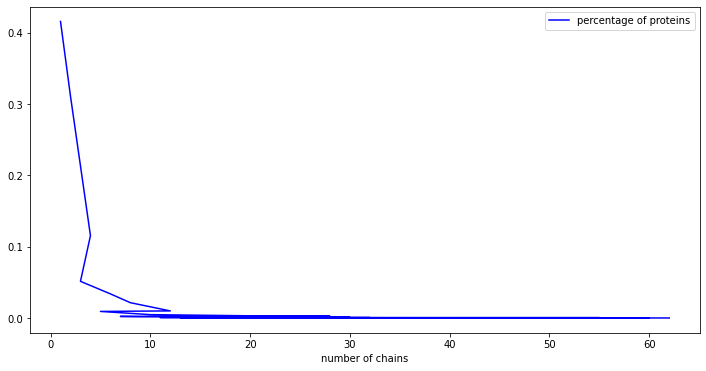

In [9]:
gb = df.groupby(['pdb_id'],as_index=False)['chain_code'].count().sort_values(by='chain_code',ascending=False)
gb.rename(columns={'chain_code':'number of chains'},inplace=True)
gb2 = gb.groupby('number of chains',as_index=False)['pdb_id'].count().sort_values(by='pdb_id',ascending=False)

gb3 = gb2.rename(columns={'pdb_id':'proteins count'})
gb3['percentage of proteins'] = gb3['proteins count']/len(df.pdb_id.unique())


gb3.plot(x='number of chains',y='percentage of proteins',figsize=(12,6),color ="blue")

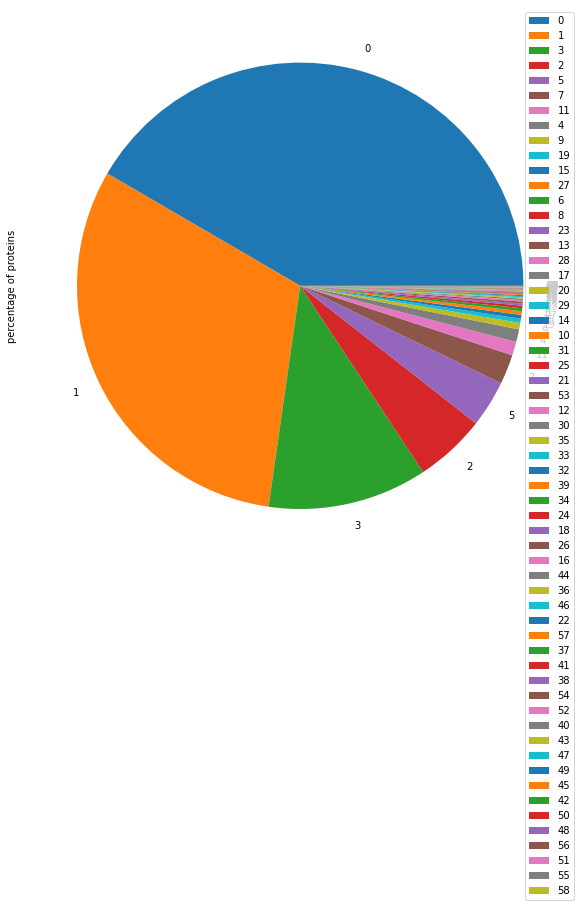

In [10]:
gb = df.groupby(['pdb_id'],as_index=False)['chain_code'].count().sort_values(by='chain_code',ascending=False)
gb.rename(columns={'chain_code':'number of chains'},inplace=True)
gb2 = gb.groupby('number of chains',as_index=False)['pdb_id'].count().sort_values(by='pdb_id',ascending=False)

gb3 = gb2.rename(columns={'pdb_id':'proteins count'})
gb3['percentage of proteins'] = gb3['proteins count']/len(df.pdb_id.unique())



gb3.plot.pie(x='number of chains',y='percentage of proteins',figsize=(10,20))

In [11]:
a = df.loc[df.pdb_id=='1A30'].sort_values(by='chain_code')
a


,pdb_id,chain_code,seq,sst8,sst3,len,has_nonstd_aa
57125,1A30,A,PQITLWKRPLVTIKIGGQLKEALLDTGADDTVIEEMSLPGRWKPKM...,CEECSSSCCEEEEEETTEEEEEEECTTBSSCEEESCCCCSCCEEEE...,CEECCCCCCEEEEEECCEEEEEEECCCECCCEEECCCCCCCCEEEE...,99,False
57126,1A30,B,PQITLWKRPLVTIKIGGQLKEALLDTGADDTVIEEMSLPGRWKPKM...,CEECSSSCCEEEEEETTEEEEEEECTTCSSCEECSCCCSSCCEEEE...,CEECCCCCCEEEEEECCEEEEEEECCCCCCCEECCCCCCCCCEEEE...,99,False
0,1A30,C,EDL,CBC,CEC,3,False


In [12]:
b = df.loc[df.pdb_id=='1A30'].sort_values(by='pdb_id')
b


,pdb_id,chain_code,seq,sst8,sst3,len,has_nonstd_aa
57125,1A30,A,PQITLWKRPLVTIKIGGQLKEALLDTGADDTVIEEMSLPGRWKPKM...,CEECSSSCCEEEEEETTEEEEEEECTTBSSCEEESCCCCSCCEEEE...,CEECCCCCCEEEEEECCEEEEEEECCCECCCEEECCCCCCCCEEEE...,99,False
57126,1A30,B,PQITLWKRPLVTIKIGGQLKEALLDTGADDTVIEEMSLPGRWKPKM...,CEECSSSCCEEEEEETTEEEEEEECTTCSSCEECSCCCSSCCEEEE...,CEECCCCCCEEEEEECCEEEEEEECCCCCCCEECCCCCCCCCEEEE...,99,False
0,1A30,C,EDL,CBC,CEC,3,False


In [13]:
print('Chain {} Sequence:\n{}'.format('A',a.loc[a.chain_code=='A','seq'].values[0]))
print('Chain {} Sequence:\n{}'.format('B',a.loc[a.chain_code=='B','seq'].values[0]))


Chain A Sequence:
PQITLWKRPLVTIKIGGQLKEALLDTGADDTVIEEMSLPGRWKPKMIGGIGGFIKVRQYDQIIIEICGHKAIGTVLVGPTPVNIIGRNLLTQIGCTLNF
Chain B Sequence:
PQITLWKRPLVTIKIGGQLKEALLDTGADDTVIEEMSLPGRWKPKMIGGIGGFIKVRQYDQIIIEICGHKAIGTVLVGPTPVNIIGRNLLTQIGCTLNF


In [14]:
print('Chain {} Q8:\n{}'.format('A',a.loc[a.chain_code=='A','sst8'].values[0]))
print('Chain {} Q8:\n{}'.format('B',a.loc[a.chain_code=='B','sst8'].values[0]))


Chain A Q8:
CEECSSSCCEEEEEETTEEEEEEECTTBSSCEEESCCCCSCCEEEEEEETTEEEEEEEEEEEEEEETTEEEEEEEEEECCSSCEECHHHHTTTTCEEEC
Chain B Q8:
CEECSSSCCEEEEEETTEEEEEEECTTCSSCEECSCCCSSCCEEEEEECSSCEEEEEEEEEEEEEETTEEEEEEEEESCCSSCEECHHHHTTTTCEEEC


In [15]:
print('Chain {} Q3:\n{}'.format('A',a.loc[a.chain_code=='A','sst3'].values[0]))
print('Chain {} Q3:\n{}'.format('B',a.loc[a.chain_code=='B','sst3'].values[0]))

Chain A Q3:
CEECCCCCCEEEEEECCEEEEEEECCCECCCEEECCCCCCCCEEEEEEECCEEEEEEEEEEEEEEECCEEEEEEEEEECCCCCEECHHHHCCCCCEEEC
Chain B Q3:
CEECCCCCCEEEEEECCEEEEEEECCCCCCCEECCCCCCCCCEEEEEECCCCEEEEEEEEEEEEEECCEEEEEEEEECCCCCCEECHHHHCCCCCEEEC


In [16]:
gb = df.groupby('seq',as_index=False)['chain_code'].count().sort_values(by='chain_code',ascending=False)
gb.rename(columns={'chain_code':'sequence occurence'},inplace=True)
gb[['sequence occurence']].describe()


,sequence occurence
count,95915.00000
mean,4.10501
std,14.28236
min,1.00000
25%,1.00000
50%,2.00000
75%,4.00000
max,2580.00000


# Data Preprocessing

In [17]:
import matplotlib.pyplot as plt

In [18]:
max_len = 128
df = df.loc[(df.len <= max_len)]

print('There are {} seq with length 128 or less.'.format(df.shape[0]))
df = df.loc[:,['seq','sst3']].drop_duplicates()
print('There are {} unique seq / sst3 pairs.'.format(df.shape[0]))

There are 93953 seq with length 128 or less.
There are 58673 unique seq / sst3 pairs.


In [19]:
RS = 15141111
np.random.seed(RS)

val_size=.10
test_size=.10

df['split'] = np.random.rand(len(df))

df_val = df.loc[df.split < val_size]
df_test = df.loc[(df.split < val_size + test_size) & (df.split >= val_size)]
df_train = df.loc[df.split >= val_size + test_size]

print(df_train.shape,df_test.shape,df_val.shape)

(47009, 3) (5864, 3) (5800, 3)


In [20]:
input_tk = Tokenizer(char_level=True,lower=False)
input_tk.fit_on_texts(df.seq)

target_tk = Tokenizer(char_level=True,lower=False)
target_tk.fit_on_texts(df.sst3)

# char to index
input_char_index = input_tk.word_index
target_char_index = target_tk.word_index

# index to char
input_index_char = dict((i, char) for char, i in input_char_index.items())
target_index_char = dict((i, char) for char, i in target_char_index.items())

# number of tokens (including padding)
num_input_tokens = 1 + len(input_char_index.items())
num_target_tokens = 1 + len(target_char_index.items())

# vectorizing
def trans_seq_in(iseq):
    maxlen = max([len(txt) for txt in iseq])
    input_seq = input_tk.texts_to_sequences(iseq)
    input_seq = pad_sequences(input_seq,maxlen=maxlen,padding='post',value=0)
    return to_categorical(input_seq,num_classes=num_input_tokens)

def trans_seq_out(iseq):
    maxlen = max([len(txt) for txt in iseq])
    target_seq = target_tk.texts_to_sequences(iseq)
    target_seq = pad_sequences(target_seq,maxlen=maxlen,padding='post',value=0)
    return to_categorical(target_seq,num_classes=num_target_tokens)

In [21]:
def ProteinV(data):
    x = trans_seq_in(data.seq)
    y = trans_seq_out(data.sst3)
    return x, y
   
x_train,y_train = ProteinV(df_train)
x_val,y_val = ProteinV(df_val)
x_test,y_test = ProteinV(df_test)

In [22]:
x_train.shape,y_train.shape,x_val.shape,y_val.shape,x_test.shape,y_test.shape

((47009, 128, 22),
 (47009, 128, 4),
 (5800, 128, 22),
 (5800, 128, 4),
 (5864, 128, 22),
 (5864, 128, 4))

In [23]:
x_in = Input(shape=(None, num_input_tokens))
x = Bidirectional(LSTM(100, return_sequences=True))(x_in)
x = TimeDistributed(Dense(200, activation='relu'))(x)
x_out = TimeDistributed(Dense(num_target_tokens, activation='softmax'))(x)

mdl= Model(x_in,x_out)
mdl.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, 22)]        0         
                                                                 
 bidirectional (Bidirectiona  (None, None, 200)        98400     
 l)                                                              
                                                                 
 time_distributed (TimeDistr  (None, None, 200)        40200     
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, None, 4)          804       
 tributed)                                                       
                                                                 
Total params: 139,404
Trainable params: 139,404
Non-trainable params: 0
_______________________________________________________

In [24]:
def q3_acc(y_true, y_pred):
    y = tf.argmax(y_true, axis=-1)
    y_ = tf.argmax(y_pred, axis=-1)
    mask = tf.greater(y, 0)
    return K.cast(K.equal(tf.boolean_mask(y, mask), tf.boolean_mask(y_, mask)), K.floatx())

In [25]:
mdl.compile('adam',loss='categorical_crossentropy',metrics=[q3_acc])
mdl.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=10,batch_size=32)

Epoch 1/10
1470/1470 [==============================] - 277s 185ms/step - loss: 0.4822 - q3_acc: 0.6724 - val_loss: 0.4262 - val_q3_acc: 0.7128
Epoch 2/10
1470/1470 [==============================] - 270s 184ms/step - loss: 0.4011 - q3_acc: 0.7343 - val_loss: 0.3954 - val_q3_acc: 0.7367
Epoch 3/10
1470/1470 [==============================] - 272s 185ms/step - loss: 0.3607 - q3_acc: 0.7641 - val_loss: 0.3472 - val_q3_acc: 0.7728
Epoch 4/10
1470/1470 [==============================] - 281s 191ms/step - loss: 0.3321 - q3_acc: 0.7852 - val_loss: 0.3238 - val_q3_acc: 0.7889
Epoch 5/10
1470/1470 [==============================] - 274s 187ms/step - loss: 0.3100 - q3_acc: 0.8008 - val_loss: 0.3153 - val_q3_acc: 0.7964
Epoch 6/10
1470/1470 [==============================] - 270s 183ms/step - loss: 0.2943 - q3_acc: 0.8117 - val_loss: 0.2981 - val_q3_acc: 0.8084
Epoch 7/10
1470/1470 [==============================] - 274s 187ms/step - loss: 0.2818 - q3_acc: 0.8205 - val_loss: 0.2897 - val_q3_acc:

In [26]:
mdl.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=5,batch_size=32)

Epoch 1/5
1470/1470 [==============================] - 294s 200ms/step - loss: 0.2496 - q3_acc: 0.8427 - val_loss: 0.2637 - val_q3_acc: 0.8333
Epoch 2/5
1470/1470 [==============================] - 293s 199ms/step - loss: 0.2436 - q3_acc: 0.8467 - val_loss: 0.2604 - val_q3_acc: 0.8369
Epoch 3/5
1470/1470 [==============================] - 273s 186ms/step - loss: 0.2386 - q3_acc: 0.8502 - val_loss: 0.2613 - val_q3_acc: 0.8358
Epoch 4/5
1470/1470 [==============================] - 266s 181ms/step - loss: 0.2354 - q3_acc: 0.8521 - val_loss: 0.2565 - val_q3_acc: 0.8393
Epoch 5/5
1470/1470 [==============================] - 268s 182ms/step - loss: 0.2298 - q3_acc: 0.8562 - val_loss: 0.2521 - val_q3_acc: 0.8432


In [27]:
mdl.save_weights('/content/drive/MyDrive/PSSP DATA')

In [28]:
mdl.evaluate(x_test,y_test)

184/184 [==============================] - 9s 51ms/step - loss: 0.2500 - q3_acc: 0.8451


[0.24995118379592896, 0.8451222777366638]

In [29]:
np.random.seed(RS)
num = 15
p = np.random.randint(0,df_test.shape[0],num)
sst3 = df_test.sst3.iloc[p]
seq = df_test.seq.iloc[p]

x = trans_seq_in(seq)
z = mdl.predict(x)
y = np.argmax(z,axis=-1)

target_index_char[0] = '' # don't display padding

txt = []
for i in range(y.shape[0]):
    s = ''
    for j in range(y.shape[1]):
        s += target_index_char[y[i,j]]        
    txt.append(s)
txt

for k,s in enumerate(seq):
    print('\n ======================================================================= \n')
    print('test sequence {} of {}: \n'.format(1+k,num))
    print('original sequence: \n {}'.format(s))
    print('\n predicted structure: \n {}'.format(txt[k]))
    print('\n actual structure: \n {}'.format(sst3.iloc[k]))



test sequence 1 of 15: 

original sequence: 
 PQFSLWKRPVVTAYIEGQPVEVLLDTGADDSIVAGIELGNNYSPKIVGGIGGFINTLEYKNVEIEVLNKKVRATIMTGDTPINIFGRNILTALGMSLNL

 predicted structure: 
 CCECCCCCCEEEEEECCCEEEEEECCCCCCCEECCCCCCCCCEEEEEECCCCEEEEEEEEEEEEEECCEEEEEEEEECCCCCCEECHHHHHHHCCEEEC

 actual structure: 
 CCCCCCCCCEEEEEECCEEEEEEECCCCCCCEEECCCCCCCCCEEEEECCCCEEEEEEEEEEEEEECCEEEEEEEEEECCCCCEECHHHHCCCCCEEEC


test sequence 2 of 15: 

original sequence: 
 GSHMRFYVKDHRNKAMINLHIQKDNPKIVHAFDMEDLGDKAVYCRCWRSKKFPFCDGACTKHNEETGDNVGPLIIKKKE

 predicted structure: 
 CCCCCCCCCCCCCCCCCCCCECCCCCCEEEEEEHHCCCCCEEECCCCCCCCCCECCHHHHHHHHHHCCCECEEEEEECC

 actual structure: 
 CCCCCCCCCCCCCCCCCCCCCCCCCCCEEEEEEHHHCCCEEEECCCCCCCCCCECCCHHHHHHHHHCCCCCCEEEECCC


test sequence 3 of 15: 

original sequence: 
 MIEMKPHPWFFGKIPRAKAEEMLSKQRHDGAFLIRESESAPGDFSLSVKFGNDVQHFKVLRDGAGKYFLWVVKFNSLNELVDYHRSTSVSRNQQIFLRDIEQVPQQPTYVQA

 predicted structure: 
 CCCCCCCCCECCCCCHHHHHHHHHCCCCCCEEEEEECCCCCCCEEEEEEECCEEEEEEEEECCCCCEECCCCCECCHHHHHHHH

# Using GNN

In [30]:
import numpy as np                                     # linear algebra
import pandas as pd                                    # data processing, CSV file I/O (e.g. pd.read_csv)
import copy                                            #to copy list
from sklearn.model_selection import train_test_split   #to split dataset into train and test set
from sklearn.svm import SVC                            #to create svc instance
from sklearn.metrics import classification_report      #to create report for precision,recall,f1-score,accuracy
from sklearn import metrics                            #to get accuracy
from sklearn.model_selection import GridSearchCV       #to optimise the hyper-parameter
import math

In [35]:
df = pd.read_csv('/content/drive/MyDrive/PSSP DATA/training_secondary_structure_train.csv')
df_test1 = pd.read_csv('/content/drive/MyDrive/PSSP DATA/test_secondary_structure_casp12.csv')


In [36]:
df.head(5)

,seq,sst3,sst8
0,AETVESCLAKSHTENSFTNVXKDDKTLDRYANYEGCLWNATGVVVC...,CCCHHHHHCCCCEEEEEECCEECCCCCCEEEEECCEEEEEEEEEEE...,CCCHHHHHTSCCEEEEEESCEECTTTCCEEEEETTEEEEEEEEEEE...
1,ASQEISKSIYTCNDNQVXEVIYVNTEAGNAYAIISQVNEXIPXRLX...,CCCCEEEEEEEECCCEEEEEEEEECCCCCEEEEEEECCEEEEEEEE...,CCCCEEEEEEEETTTEEEEEEEEECTTSCEEEEEEETTEEEEEEEE...
2,XGSSHHHHHHSSGRENLYFQGXNISEINGFEVTGFVVRTTNADEXN...,CCCCCCCCCCCCCCCCCEEEEEEEEEECCEEEEEEEEEECHHHHHC...,CCCCCCCCCCCCCCCCCEEEEEEEEEECCEEEEEEEEEECHHHHHS...
3,SNADYNRLSVPGNVIGKGGNAVVYEDAEDATKVLKMFTTSQSNEEV...,CCCCCCCCCCEEEEEEECCCEEEEEECCCCCEEEEEECCCCCHHHH...,CCCCCCCCCCEEEEEEECSSEEEEEETTCTTEEEEEESSCCCHHHH...
4,DTVGRPLPHLAAAMQASGEAVYCDDIPRYENELFLRLVTSTRAHAK...,CCCCCCCCCCCHHHHHCCCCCCHHHCCCCCCCEEEEEEECCCCCEE...,CCTTSCCCCTTHHHHHTTCSCCGGGSCCCTTCEEEEEEECSSSSEE...


In [37]:
#dataset 4
input_seqs, target_seqs = df[['seq', 'sst8']].values.T
input_seqs_test1, target_seqs_test1 = df_test1[['seq', 'sst8']].values.T

print(input_seqs[0:8])
print(input_seqs_test1[0:8])

['AETVESCLAKSHTENSFTNVXKDDKTLDRYANYEGCLWNATGVVVCTGDETQCYGTWVPIGLAIPENEGGGSEGGGSEGGGSEGGGTKPPEYGDTPIPGYTYINPLDGTYPPGTEQNPANPNPSLEESQPLNTFMFQNNRFRNRQGALTVYTGTVTQGTDPVKTYYQYTPVSSKAMYDAYWNGKFRDCAFHSGFNEDIFVCEYQGQSSDLPQPPVNA'
 'ASQEISKSIYTCNDNQVXEVIYVNTEAGNAYAIISQVNEXIPXRLXKXASGANYEAIDKNYTYKLYTKGKTAELVEGDDKPVLSNCSLANLEHHHHHH'
 'XGSSHHHHHHSSGRENLYFQGXNISEINGFEVTGFVVRTTNADEXNPXTAKIGNLWEKFYLNAAPKLTDKSKVYGLYTNYESDFTGAFDVIACSDTLSPQLLSESVKTKVSSGKYVTFSATGEXPQVVIDLWNEVWNYFASEHCPHKRAYTTDFEYYKSANTVEISIAVR'
 'SNADYNRLSVPGNVIGKGGNAVVYEDAEDATKVLKMFTTSQSNEEVTSEVRCFNQYYGAGSAEKIYGNNGDIIGIRMDKINGESLLNISSLPAQAEHAIYDMFDRLEQKGILFVDTTETNVLYDRAKNEFNPIDISSYNVSDRSWSESQIMQSYHGGKQDLISVVLSKI'
 'DTVGRPLPHLAAAMQASGEAVYCDDIPRYENELFLRLVTSTRAHAKIKSIDVSEAQKVPGFVCFLSADDIPGSNETGLFNDETVFAKDTVTCVGHIIGAVVADTPEHAERAAHVVKVTYEDLPAIITIEDAIKNNSFYGSELKIEKGDLKKGFSEADNVVSGELYIGGQDHFYLETHCTIAIPKGEEGEMELFVSTQNAMKTQSFVAKMLGVPVNRILVRVKRMGGGFGGKETRSTLVSVAVALAAYKTGHPVRCMLDRNEDMLITGGRHPFLARYKVGFMKTGTIVALEVDHYSNAGNSRDLSHSIMERALFHMDNCYKIPNIRGTG

In [38]:
print(target_seqs[0:8])
print(target_seqs.size)

['CCCHHHHHTSCCEEEEEESCEECTTTCCEEEEETTEEEEEEEEEEECTTSSEEEEEEEEEEECCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCSSCEEEEECCCTTSSSSCBSSSSBCSCSSCEEESSCCSSCEEETTEEEEEETTEEEEEEEEEEECSTTCEEEEEEEECCCHHHHHHHHTTTTTTTSCCCSSCCCCEECSCCSSEEEECSSCTTC'
 'CCCCEEEEEEEETTTEEEEEEEEECTTSCEEEEEEETTEEEEEEEEECCCCEEEEESSTTCCCEEEEETTEEEEEETTTEEEEEEEEECCCCCCCCCC'
 'CCCCCCCCCCCCCCCCCEEEEEEEEEECCEEEEEEEEEECHHHHHSTTTCCHHHHHHHHHHHTGGGCCTTCCEEEEEECCSSSTTSCEEEEEEESSCCTTTSTTCEEEEECCEEEEEEEEESSTTHHHHHHHHHHHHHHCCCCCCCCBCCSEEEEECCSSSEEEEEEEBC'
 'CCCCCCCCCCEEEEEEECSSEEEEEETTCTTEEEEEESSCCCHHHHHHHHHHHHHHHCTTSEEEEECTTSCEEEEEEECCCSEETTSCCCCCTTHHHHHHHHHHHHHHTTCCBCCCSTTSEEEETTTTEEEESSCCBCCCCCCCCCHHHHHHHHHHHHHHHHHHHHTTC'
 'CCTTSCCCCTTHHHHHTTCSCCGGGSCCCTTCEEEEEEECSSSSEEEEEEECTTGGGSTTEEEEECGGGCSSCSEESTTSCEESSCCSEECSTTCEEEEEEESSHHHHHHHHHTCEEEEEECCCCCSHHHHHHTTCEEEEEEEEEESCHHHHHHHCSEEEEEEEEECCBCCCCSSCCEEEEEECSSTTCEEEEECCSCHHHHHHHHHHHHTCCGGGEEEEECCCSCCTTTTSSTTHHHHHHHHHHHHHHSSCEEEECCHHHHHHHSCCBCCEEEEEEEEECTTCCEEEEEEEEEEEEESSCTTHHHHHHHHHHTTTTTBCCSSEEEEE

In [39]:
inputSeqs=[]
targetSeqs=[]
for i in range(input_seqs.size):
    j=0
    while(j<len(input_seqs[i])/128):
        start = j*128
        end = start+128
        inputSeqs.append(input_seqs[i][start:end])
        targetSeqs.append(target_seqs[i][start:end])
        j+=1
        
print(len(targetSeqs))
print(len(inputSeqs))

21683
21683


In [40]:
inputSeqs_test1=[]
targetSeqs_test1=[]
for i in range(input_seqs_test1.size):
    j=0
    while(j<len(input_seqs_test1[i])/128):
        start = j*128
        end = start+128
        inputSeqs_test1.append(input_seqs_test1[i][start:end])
        targetSeqs_test1.append(target_seqs_test1[i][start:end])
        j+=1
        
print(len(targetSeqs_test1))
print(len(inputSeqs_test1))


67
67


In [41]:
for row in range(len(targetSeqs_test1)):
    secondary_lenth1 = len(targetSeqs_test1[row])
    primary_lenth1 = len(inputSeqs_test1[row])
    
    if(secondary_lenth1 != primary_lenth1):
        print("(",row,") Secondary_Structure ->", targetSeqs_test1[row]," Primary_Structure -> ",inputSeqs_test1[row])
    
print(len(inputSeqs_test1))

67


In [42]:
for row in range(len(targetSeqs)):
    secondary_lenth = len(targetSeqs[row])
    primary_lenth = len(inputSeqs[row])
    
    if(secondary_lenth != primary_lenth):
        print("(",row,") Secondary_Structure ->", targetSeqs[row]," Primary_Structure -> ",inputSeqs[row])
    
print(len(inputSeqs))


21683


In [43]:
secondary_count = 0
primary_count = 0
dataCheck = "WCEDGFIHKMLNQPSRTERVY"
index=[]
for row in range(len(targetSeqs)):
    secondary_lenth = len(targetSeqs[row])
    primary_lenth = len(inputSeqs[row])
    secondary_count = secondary_count + secondary_lenth
    primary_count = primary_count + primary_lenth
    if(secondary_lenth != primary_lenth):
        print("(",row,") Secondary_Structure ->", targetSeqs[row]," Primary_Structure -> ",inputSeqs[row])
    for col in range(len(inputSeqs[row])):
        #print("before :",inputSeqs[row][col])
        if len(inputSeqs[row])<2:
            index.append(row)
        if dataCheck.find(inputSeqs[row][col])==-1:
            #print("after :",inputSeqs[row][col])
            index.append(row)
           # print("Row : "+str(row)+"have been deleted for having unknown data")
            break
            

inputSeqs =np.delete(inputSeqs,index)
targetSeqs =np.delete(targetSeqs,index)
        
print("count of secondary structure : ",secondary_count)
print("count of primary structure : ",primary_count)
print("size of primary structure : ",len(inputSeqs))

count of secondary structure :  2221507
count of primary structure :  2221507
size of primary structure :  943


In [44]:
def split(sequence): 
    return [char for char in sequence]

In [45]:
primary_split = []
secondary_split = []
for row in range(int(len(targetSeqs)/1)):
    primary_split.append(split(inputSeqs[row]))
    secondary_split.append(split(targetSeqs[row]))
    
print(len(primary_split))


943


In [46]:
primary_split_test1 = []
secondary_split_test1 = []
for row in range(int(len(targetSeqs_test1)/1)):
    primary_split_test1.append(split(inputSeqs_test1[row]))
    secondary_split_test1.append(split(targetSeqs_test1[row]))
    
print(len(primary_split_test1))

67


In [47]:
def orthogonal_primary(arg):
    switch = {
        'A' : np.array([1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]),  # 20 amino acids
        'C' : np.array([0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]),
        'E' : np.array([0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]),
        'D' : np.array([0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]),
        'G' : np.array([0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]),
        'F' : np.array([0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0]),
        'I' : np.array([0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0]),
        'H' : np.array([0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0]),
        'K' : np.array([0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0]),
        'M' : np.array([0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0]),
        'L' : np.array([0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0]),
        'N' : np.array([0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0]),
        'Q' : np.array([0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0]),
        'P' : np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0]),
        'S' : np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0]),
        'R' : np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0]),
        'T' : np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0]),
        'W' : np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0]),
        'V' : np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0]),
        'Y' : np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1]),
        'X' : np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
    }
    
    return switch.get(arg)

def orthogonal_secondary(arg):
    switch = {
        'H' : 0,                    # H= α-helix
        'C' : 1,                    # C= Loops and irregular elements
        'E' : 2,                    # E= β-strand
        'B' : 3,                    # B= β-bridge
        'G' : 4,                    # G= 3-helix
        'I' : 5,                    # I= π-helix
        'T' : 6,                    # T= Turn
        'S' : 7                     # S= Bend
    }
    
    return switch.get(arg)

In [48]:
for row in range(len(primary_split_test1)):  
    sequence1 = primary_split_test1[row]
    for col in range(len(sequence1)):
        #print(sequence[col])
        sequence1[col] = orthogonal_primary(sequence1[col])
        #print(sequence[col])

In [49]:
for row in range(len(secondary_split)):  
    sequenceS = secondary_split[row]
    for col in range(len(sequenceS)):
        sequenceS[col] = orthogonal_secondary(sequenceS[col])

In [50]:
for row in range(len(secondary_split_test1)):  
    sequenceS1 = secondary_split_test1[row]
    for col in range(len(sequenceS1)):
        sequenceS1[col] = orthogonal_secondary(sequenceS1[col])

In [51]:
primary_split_test1[0:5]

[[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
  array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
  array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
  array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
  array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
  array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
  array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
  array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
  array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]),
  array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
  array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]),
  array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
  array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]),
  array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]),
  arra

In [52]:
def graph_sum2(seq1,seq2):
    result=[None]*len(seq1)
    for col in range(len(seq1)):
        result[col] =  seq1[col]+seq2[col]
    return result


def graph_sum3(seq1,seq2,seq3):
    result=[None]*len(seq1)
    for col in range(len(seq1)):
        result[col] =  seq1[col]+seq2[col]+seq3[col]
    return result

In [53]:
graph_input = copy.deepcopy(primary_split)
for row in range(len(primary_split)):
    sequence = primary_split[row]
    graph_input[row][0]=graph_sum2(sequence[0],sequence[1])
    graph_input[row][len(sequence)-1]=graph_sum2(sequence[len(sequence)-1],sequence[len(sequence)-2])
    for col in range(1,len(sequence)-1):
        graph_input[row][col] = graph_sum3(sequence[col-1],sequence[col],sequence[col+1])
        
graph_input[0:5]

[[['EF'],
  ['EFN'],
  ['FNP'],
  ['NPI'],
  ['PID'],
  ['IDI'],
  ['DIS'],
  ['ISS'],
  ['SSY'],
  ['SYN'],
  ['YNV'],
  ['NVS'],
  ['VSD'],
  ['SDR'],
  ['DRS'],
  ['RSW'],
  ['SWS'],
  ['WSE'],
  ['SES'],
  ['ESQ'],
  ['SQI'],
  ['QIM'],
  ['IMQ'],
  ['MQS'],
  ['QSY'],
  ['SYH'],
  ['YHG'],
  ['HGG'],
  ['GGK'],
  ['GKQ'],
  ['KQD'],
  ['QDL'],
  ['DLI'],
  ['LIS'],
  ['ISV'],
  ['SVV'],
  ['VVL'],
  ['VLS'],
  ['LSK'],
  ['SKI'],
  ['IK']],
 [['VD'], ['VDL'], ['DLG'], ['LGQ'], ['QG']],
 [['LL'],
  ['LLP'],
  ['LPP'],
  ['PPH'],
  ['PHL'],
  ['HLV'],
  ['LVH'],
  ['VHH'],
  ['HHH'],
  ['HHH'],
  ['HHH'],
  ['HHH'],
  ['HH']],
 [['VL'], ['LV']],
 [['FD'], ['FDY'], ['DYD'], ['YDI'], ['ID']]]

In [54]:
graph_input_test1 = copy.deepcopy(primary_split_test1)
temp = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
for row in range(len(primary_split_test1)):
    sequence1 = primary_split_test1[row]
    if len(sequence1)>1:
        graph_input_test1[row][0]=graph_sum2(sequence1[0],sequence1[1])
        graph_input_test1[row][len(sequence1)-1]=graph_sum2(sequence1[len(sequence1)-1],sequence1[len(sequence1)-2])
        for col in range(1,len(sequence1)-1):
            graph_input_test1[row][col] = graph_sum3(sequence1[col-1],sequence1[col],sequence1[col+1])
    else:
        graph_input_test1[row][0]=graph_sum2(sequence1[0],temp)
        
graph_input_test1[0:10]

[[[0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1],
  [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
  [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1],
  [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1

In [55]:
def targetY(data_list):
    Y = []
    for i in range(len(data_list)):
        for j  in range(len(data_list[i])):
            Y.append(data_list[i][j])
    return Y

In [56]:
y_label = targetY(secondary_split)
y_label_test1 = targetY(secondary_split_test1)

In [57]:
print(len(y_label))
print(y_label[0:15])

17782
[2, 2, 2, 2, 7, 7, 1, 1, 3, 1, 1, 1, 1, 1, 1]


In [58]:
print(len(y_label_test1))
print(y_label_test1[0:15])

7256
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [59]:
def window_padding_data(size, sequence):
    num = int(size/2)
    #print("initial :",sequence[0])
    #print("")
    zeros = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
    for i in range(len(sequence)):
        for j in range(num):
            sequence[i].append(zeros)
            sequence[i].insert(0, zeros)
            #print(sequence[i])
            #print("")
            
    X = []
    temp = []

    for k in range(len(sequence)):
        #print(sequence[k])
        for l in range(len(sequence[k])-(size-1)):
            temp = sequence[k][l:l+size]
           # print(temp)
            X.append(temp)
            temp = []

    return X

In [60]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = 20, 15

In [61]:
X = window_padding_data(11,graph_input)
print(len(X))
X[0:15]
G = nx.Graph()

# Create node
for i in range(15):
    G.add_node(i)
    
# Create edge
for i in range(15):
    c = np.random.choice(range(1,15))
    G.add_edge(0,i+1)
    
print(f'Node : {G.nodes} \nEdges : {G.edges}')
print(f'Node : {G.nodes} \nEdges : {G.edges}')

17782
Node : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15] 
Edges : [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15)]
Node : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15] 
Edges : [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15)]


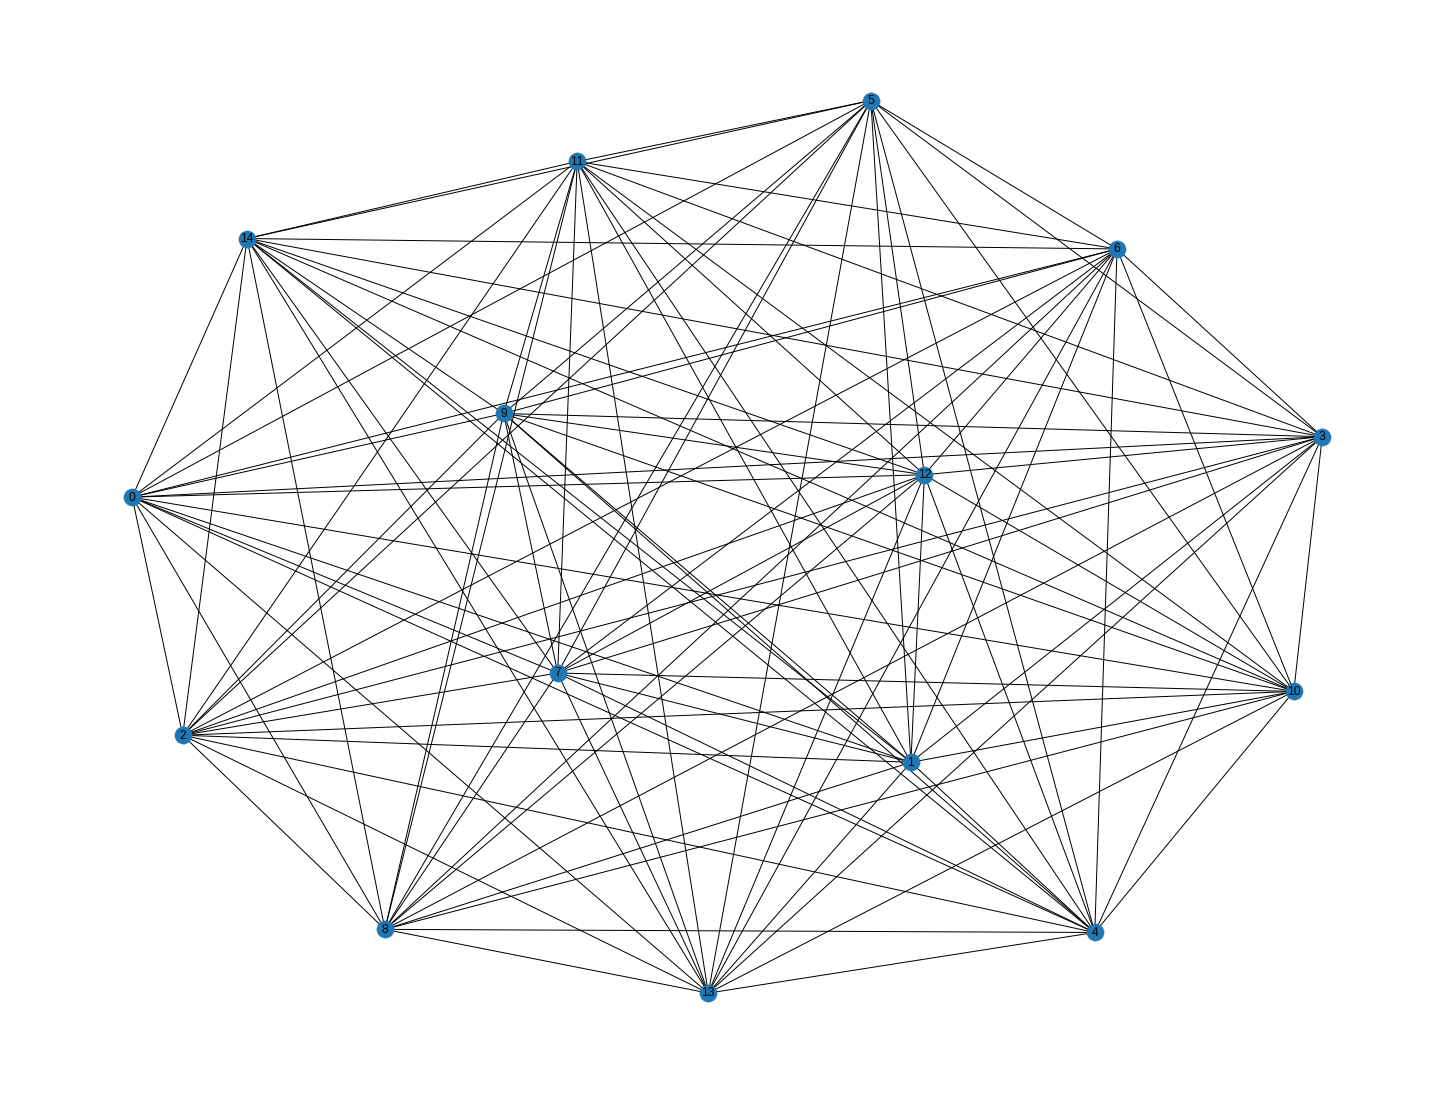

In [64]:
K = nx.complete_graph(15)
nx.draw(K, with_labels=1)

In [65]:
X_test1 = window_padding_data(11,graph_input_test1)
print(len(X_test1))
X_test1[0:5]

7256


[[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
  array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
  array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
  array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
  array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
  [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
 [array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
  array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
  array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
  array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [66]:
X_test1 = window_padding_data(11,graph_input_test1)
print(len(X_test1))

G = nx.Graph()

# Create node
for i in range(20):
    G.add_node(i)
    
# Create edge
for i in range(15):
    c = np.random.choice(range(1,20))
    G.add_edge(0,i+1)
    
print(f'Node : {G.nodes} \nEdges : {G.edges}')
X_test1[0:15]

7926
Node : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19] 
Edges : [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15)]


[[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
  array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
  array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
  array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
  array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
  array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
  array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
  array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
  array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
  array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
  [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
 [array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
  array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
  array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
  array([0, 